In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [2]:
prices = pd.read_csv(r"../data/processed/prices_final.csv", header=[0, 1],index_col=0)
benchmark = pd.read_csv(r"../data/processed/benchmark_final.csv", header=[0, 1],index_col=0)

In [3]:
# # Finding daily returns : Aaj ke price ne kal ke price ke comparison me kitna move kiya?

daily_returns = prices.pct_change()
benchmark_returns = benchmark.pct_change()

In [4]:
# Improving return series :

daily_returns = daily_returns.dropna()
benchmark_returns = benchmark_returns.dropna()

In [5]:
# Finding cumulative returns : Agar maine pehle din invest kiya hota to aaj mere paas kitna paisa hota?

cumulative_returns = (1 + daily_returns).cumprod()
benchmark_cum = (1 + benchmark_returns).cumprod()

# Why cumprod() :Compounding is multiplicative, not additive

C:\Users\Varun Gupta\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [6]:
# Performance comparison :

total_returns = cumulative_returns.iloc[-1] - 1
benchmark_total_return = benchmark_cum.iloc[-1] - 1

In [7]:
# Stock cumulative returns : 

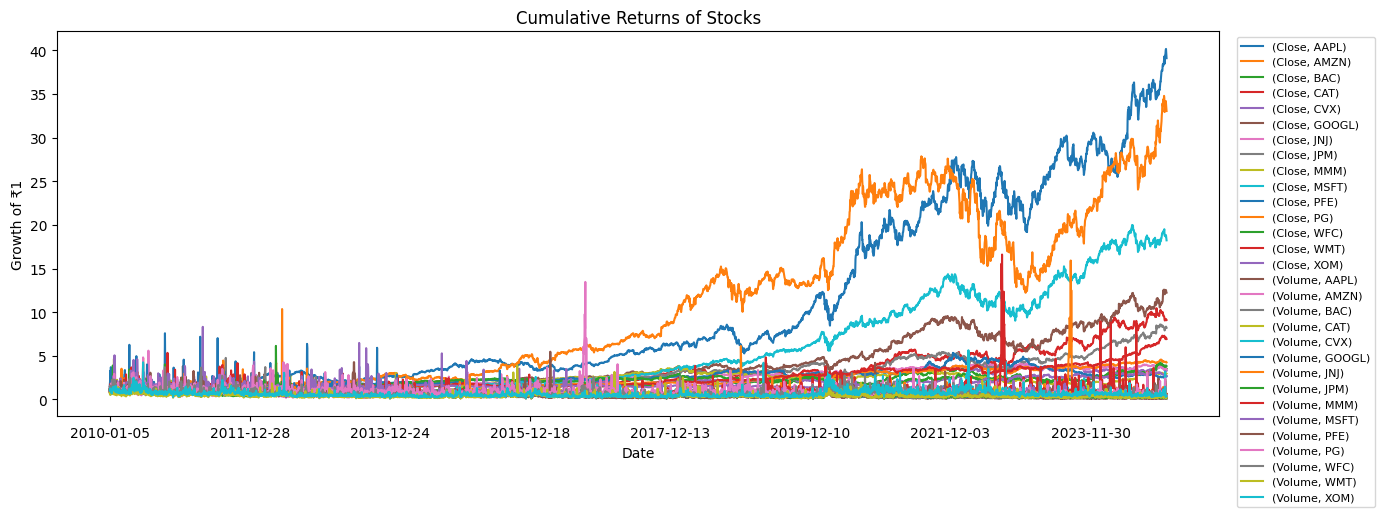

In [8]:
temp = cumulative_returns.plot(figsize=(15,5))
plt.title("Cumulative Returns of Stocks")
plt.ylabel("Growth of ₹1")
temp.legend(bbox_to_anchor=(1.01, 1), fontsize=8)
plt.show()

### Conclusions :
### 1. Equity returns are highly unequal over long horizons, all the stocks are supposed to start with ₹1, a small subset of stocks drives most of the wealth creation.
### 2. Long-term equity performance is strongly sector-driven, with technology exhibiting superior compounding over the period.
### 3.High returns come with significant volatility; holding period discipline is critical.

In [9]:
# Benchmark cumulative returns : 

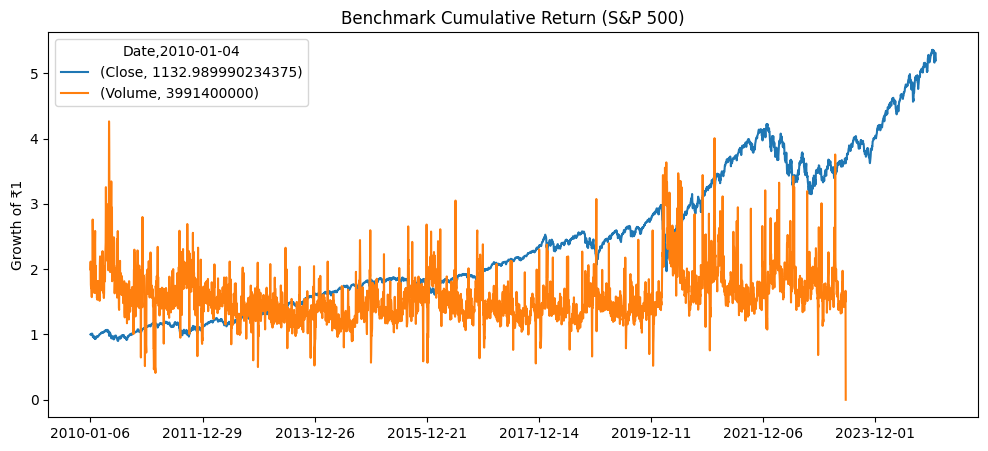

In [10]:
benchmark_cum.plot(figsize=(12,5))
plt.title("Benchmark Cumulative Return (S&P 500)")
plt.ylabel("Growth of ₹1")
plt.show()


### Conclusions : 

### 1. Market index offers diversification benefits and lower risk.
### 2. Index investing delivers stable market returns, but underperforms concentrated winners over long horizons.

In [11]:
# Detailed analysis of benchmark with top 3 stocks : 

C:\Users\Varun Gupta\AppData\Local\Temp\ipykernel_16004\1725685474.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cumulative_returns[stock], label=stock)


<Figure size 1200x500 with 0 Axes>

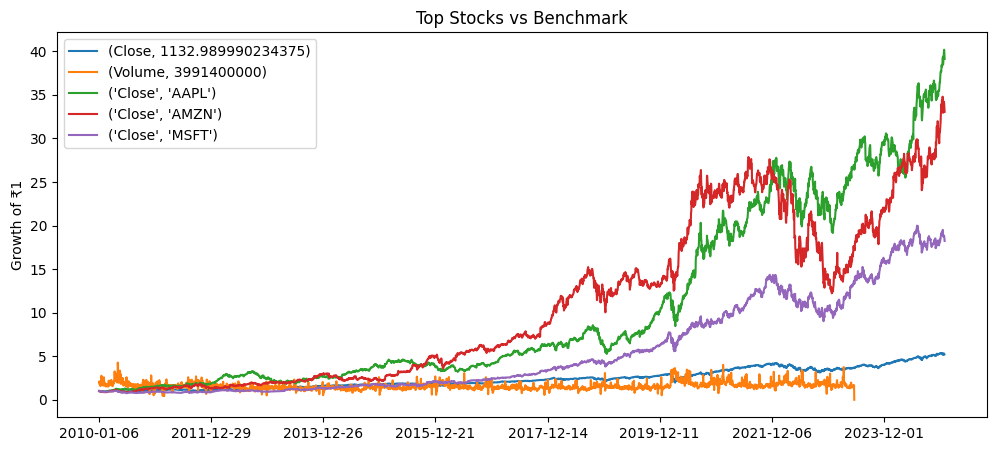

In [12]:
plt.figure(figsize=(12,5))
benchmark_cum.plot(figsize=(12,5), legend=True)
top_stocks = total_returns.sort_values(ascending=False).head(3).index
for stock in top_stocks:
    plt.plot(cumulative_returns[stock], label=stock)

plt.legend()
plt.title("Top Stocks vs Benchmark")
plt.ylabel("Growth of ₹1")
plt.show()


### Conclusions :

### 1. Certain stocks exhibit sustained long-term outperformance relative to the market.
### 2. Alpha comes with higher drawdown risk; stock selection requires tolerance for deeper temporary losses.
### 3. Benchmark-relative analysis is essential to distinguish skill-driven returns from market exposure.

In [13]:
# Outcomes :
# Cumulative return analysis shows that equity wealth creation is highly concentrated,
# with a small number of stocks generating disproportionate long-term returns. 
# While the benchmark provides smoother, diversified growth, select stocks significantly 
# outperform at the cost of higher volatility and drawdowns.